In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Data Loading

In [ ]:
data = pd.read_csv('/content/diabetes_prediction_dataset.csv')
data.head(10)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


Data Visualization and cleaning

In [ ]:
# sns.heatmap(data.corr(), annot=True)
# plt.show()

Correlation Matrix

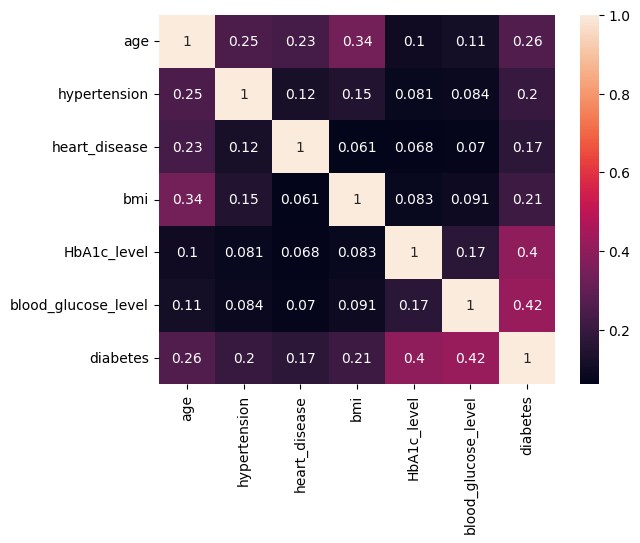

In [ ]:
sns.heatmap(data.corr(numeric_only=True), annot=True) # Set numeric_only to True to only include numerical columns
plt.show()

Distribution of Features

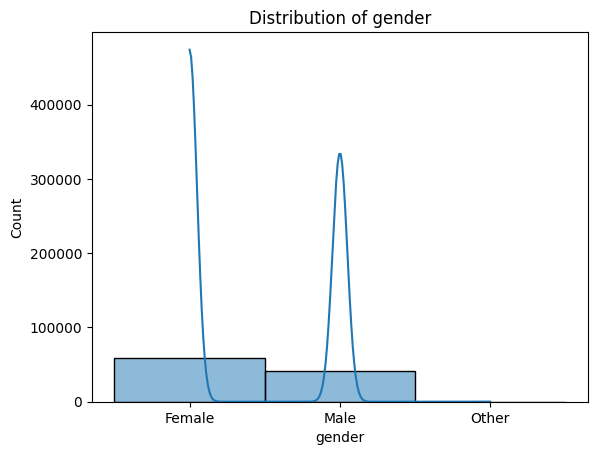

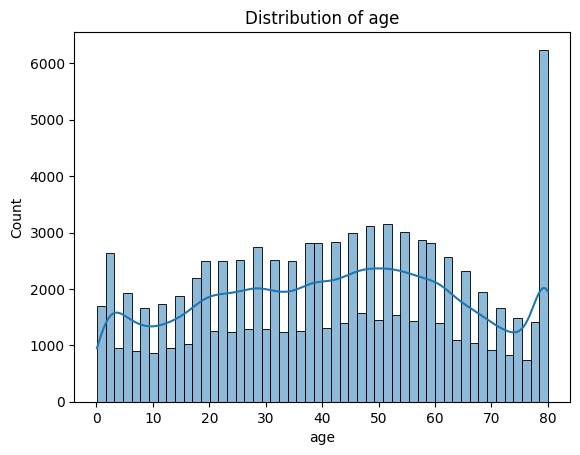

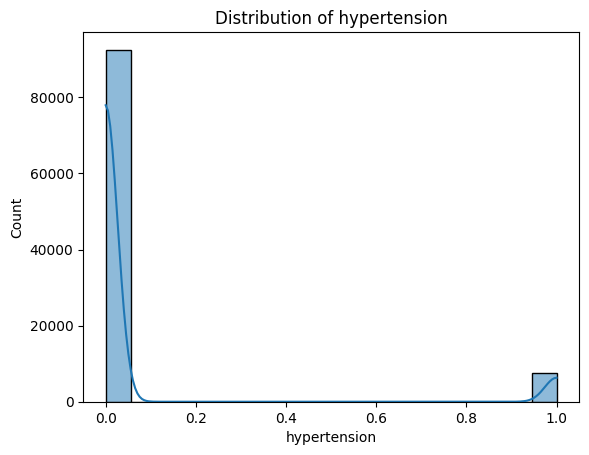

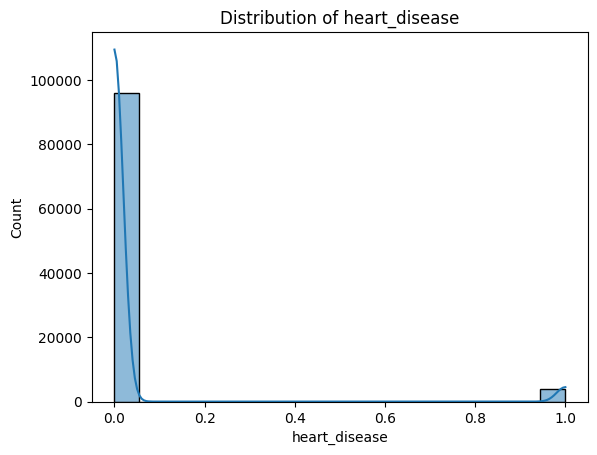

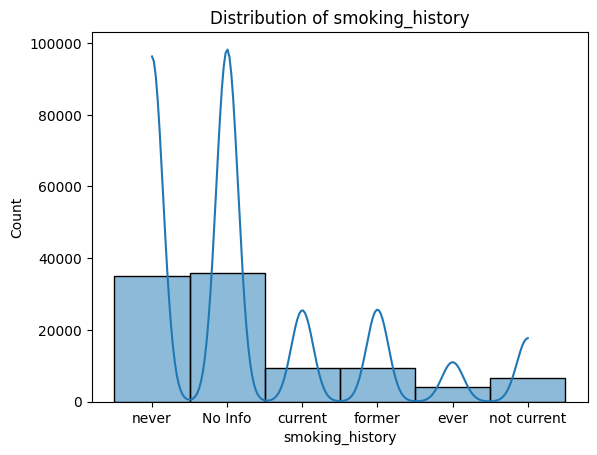

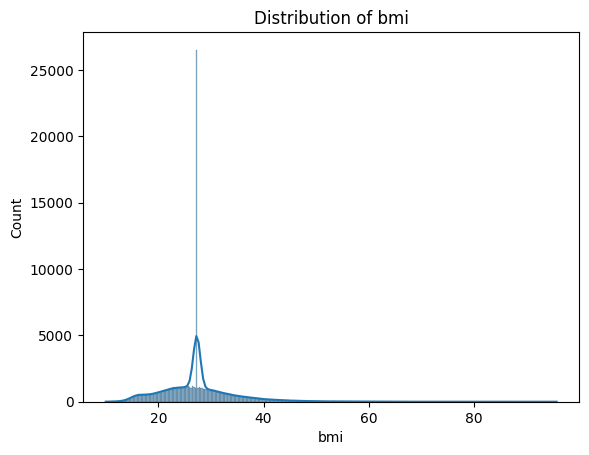

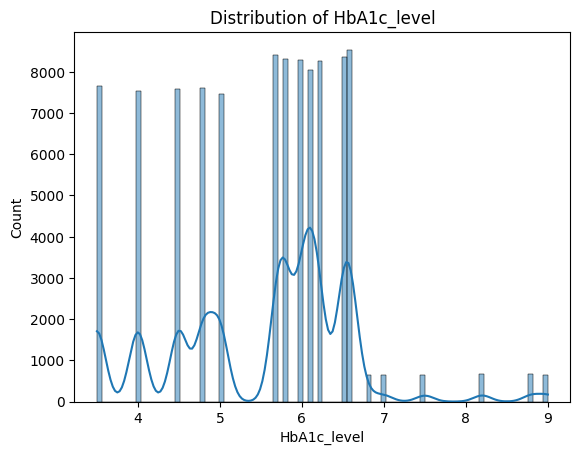

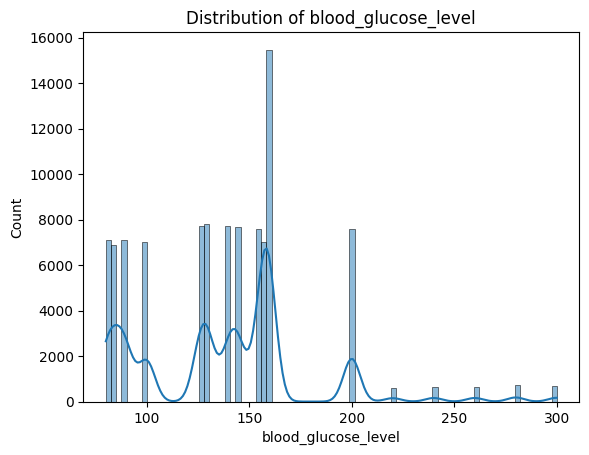

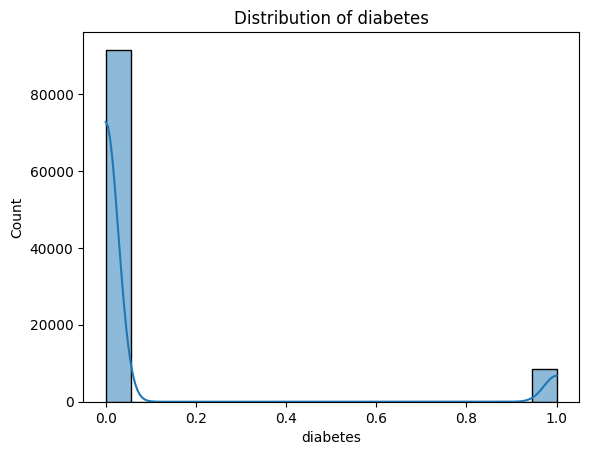

In [ ]:
for column in data.columns:
  sns.histplot(data[column], kde=True)
  plt.title(f'Distribution of {column}')
  plt.show()


Boxplots for Outliers (Not mandatory)

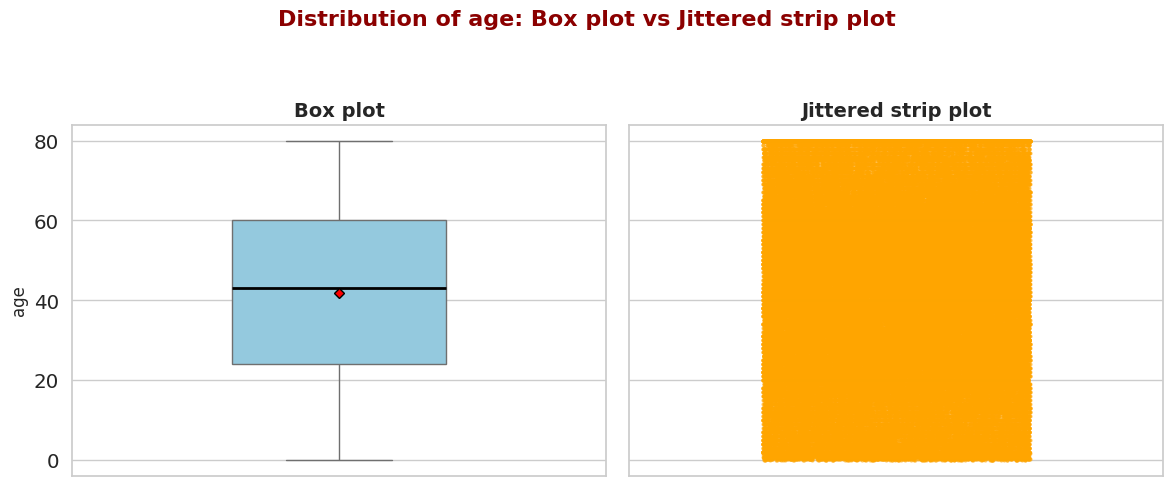

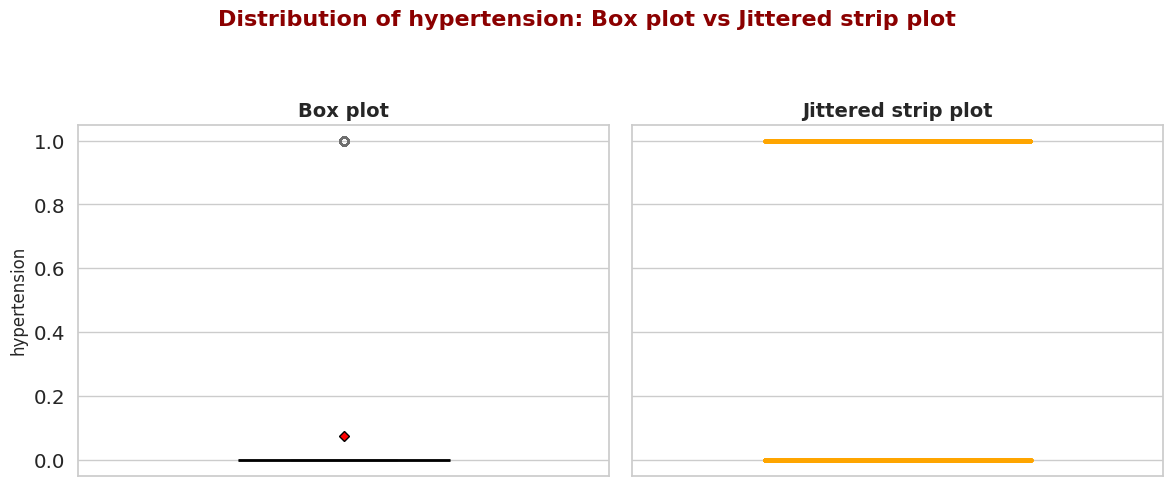

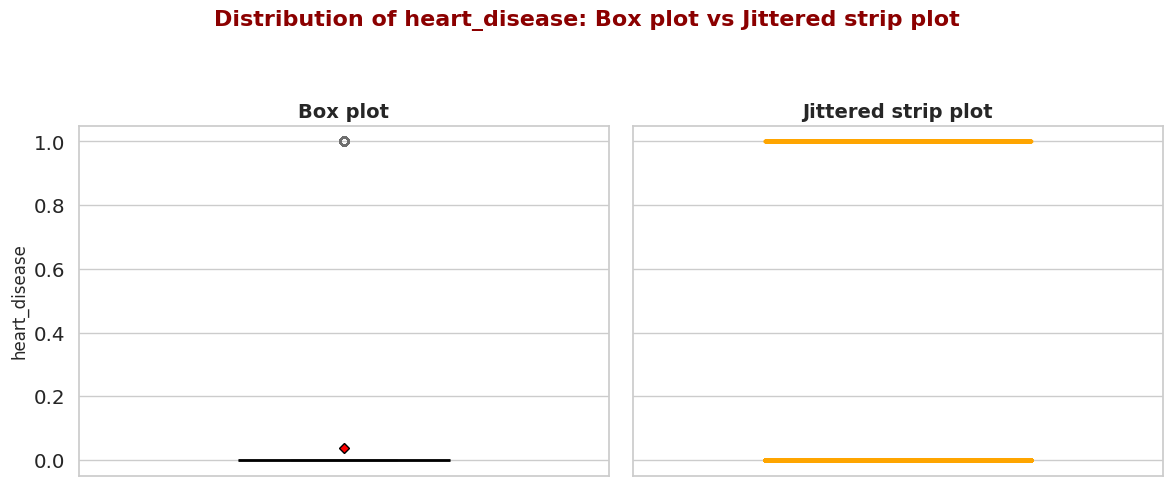

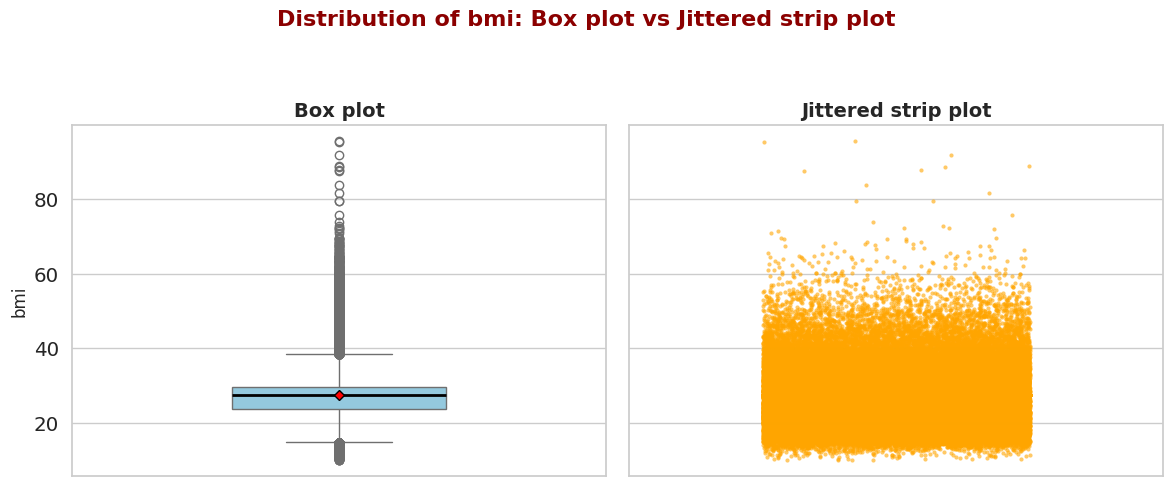

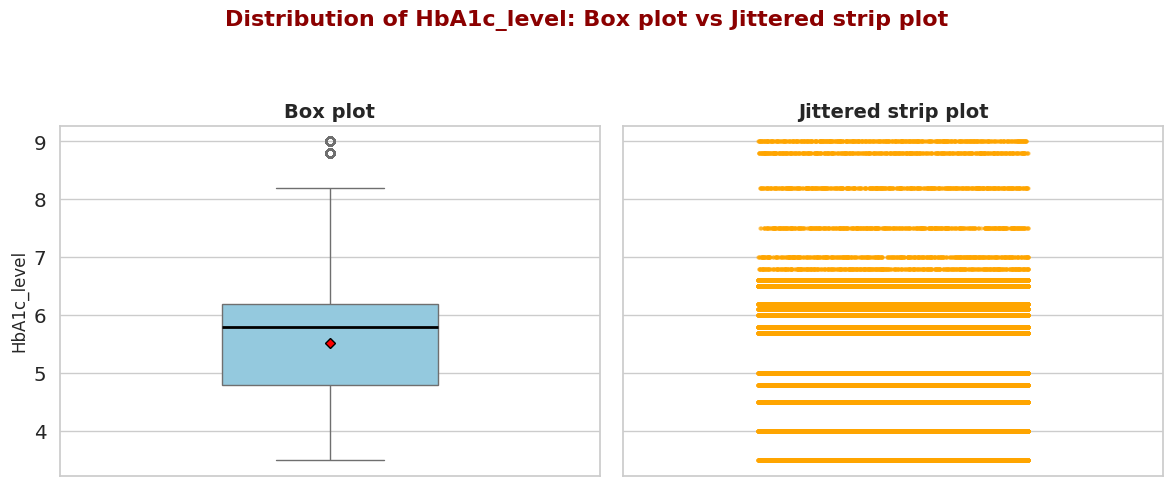

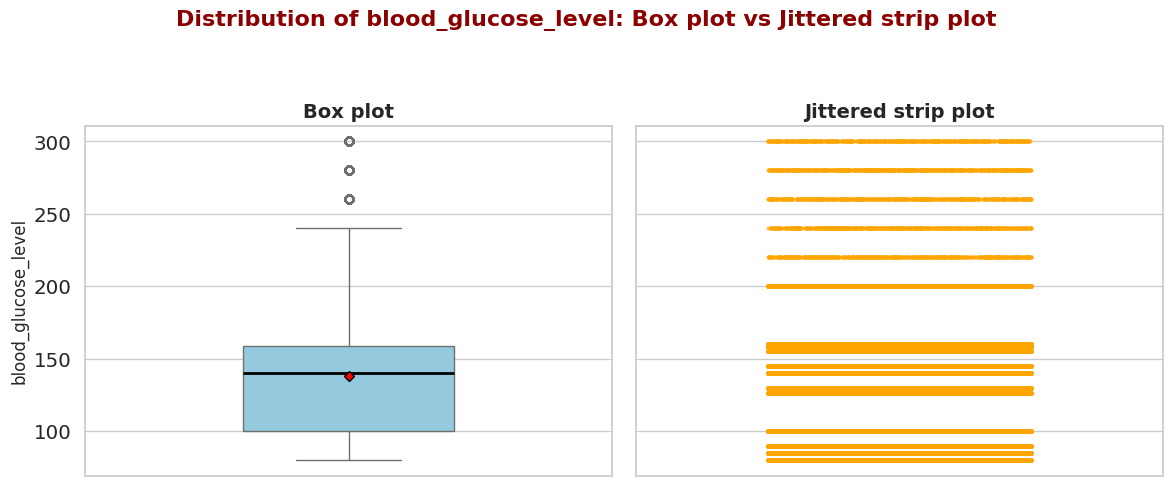

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Professional theme
sns.set_theme(style="whitegrid", font_scale=1.3)

# Identify numeric features (excluding target if needed)
numerical_cols = data.select_dtypes(include="number").columns.tolist()
if "diabetes" in numerical_cols:
    numerical_cols.remove("diabetes")

# Loop through all numeric features
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

    # --- Left Panel: Boxplot ---
    sns.boxplot(
        data=data, y=col,
        ax=axes[0],
        color="skyblue",
        showcaps=True,
        showmeans=True,
        meanprops={"marker":"D", "markerfacecolor":"red", "markeredgecolor":"black", "markersize":5},
        medianprops={"color":"black", "linewidth":2},
        width=0.4
    )
    axes[0].set_title("Box plot", fontsize=14, weight="bold")
    axes[0].set_xlabel("")
    axes[0].set_ylabel(col, fontsize=12)

    # --- Right Panel: Stripplot ---
    sns.stripplot(
        data=data, y=col,
        ax=axes[1],
        color="orange", alpha=0.6, jitter=0.25, size=3
    )
    axes[1].set_title("Jittered strip plot", fontsize=14, weight="bold")
    axes[1].set_xlabel("")
    axes[1].set_ylabel("")

    # --- Main Title ---
    fig.suptitle(
        f"Distribution of {col}: Box plot vs Jittered strip plot",
        fontsize=16, weight="bold", color="darkred"
    )

    plt.tight_layout(rect=[0,0,1,0.93])
    plt.show()


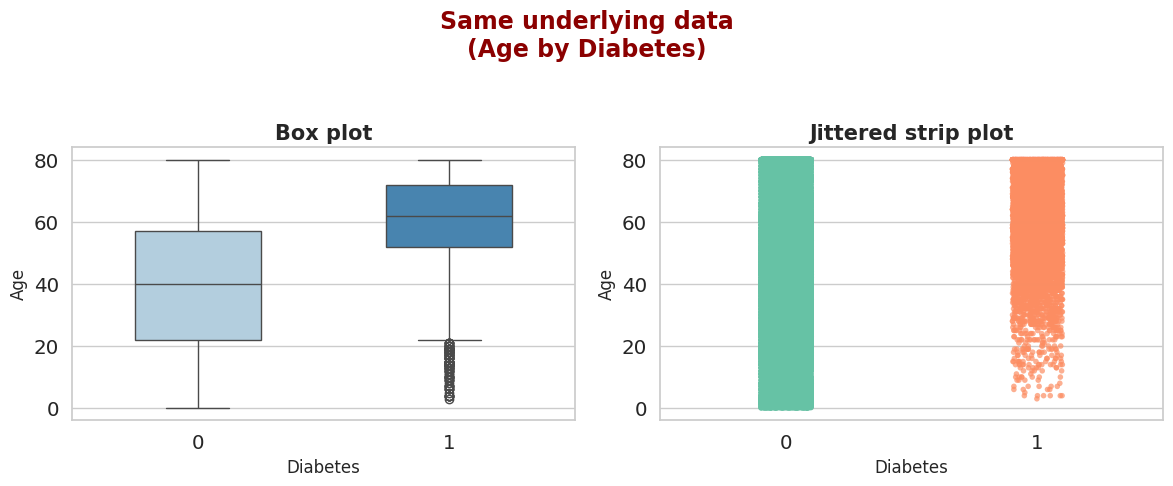

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Professional style
sns.set_theme(style="whitegrid", font_scale=1.3)

# Pick two numerical columns for demo (like Material 1 vs 2 in your image)
# Replace with the features you want to compare
col = "age"   # Example numeric column
group = "diabetes"  # Example categorical grouping (0/1)

plt.figure(figsize=(12,5))

# --- Left Panel: Boxplot ---
plt.subplot(1,2,1)
sns.boxplot(
    data=data, x=group, y=col,
    palette="Blues",
    width=0.5
)
plt.title("Box plot", fontsize=15, weight="bold")
plt.xlabel(group.capitalize(), fontsize=12)
plt.ylabel(col.capitalize(), fontsize=12)

# --- Right Panel: Jittered Stripplot ---
plt.subplot(1,2,2)
sns.stripplot(
    data=data, x=group, y=col,
    jitter=True, alpha=0.7,
    palette="Set2", size=4
)
plt.title("Jittered strip plot", fontsize=15, weight="bold")
plt.xlabel(group.capitalize(), fontsize=12)
plt.ylabel(col.capitalize(), fontsize=12)

# --- Main Title (across both) ---
plt.suptitle(
    f"Same underlying data\n({col.capitalize()} by {group.capitalize()})",
    fontsize=17, weight="bold", color="darkred"
)

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()


<Axes: >

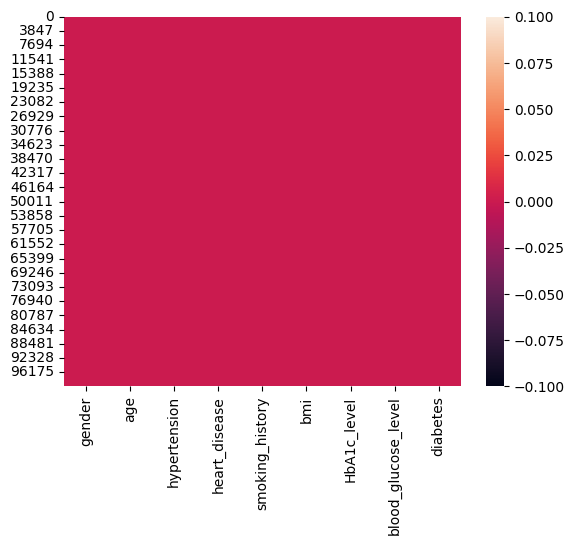

In [ ]:
sns.heatmap(data.isnull())

Dropping Irrelevant Columns

In [ ]:
# Remove columns that are not relevant to diabetes prediction
data = data.drop(['gender', 'smoking_history'], axis=1)

# Check for missing values
print(data.isnull().sum())

data.head(10)


age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0
5,20.0,0,0,27.32,6.6,85,0
6,44.0,0,0,19.31,6.5,200,1
7,79.0,0,0,23.86,5.7,85,0
8,42.0,0,0,33.64,4.8,145,0
9,32.0,0,0,27.32,5.0,100,0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Check for missing values
print(data.isnull().sum())



print(f"Number of duplicate rows: {data.duplicated().sum()}")
for column in data.select_dtypes(include='object'):
  print(f"Unique values in {column}: {data[column].unique()}")


age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64
Number of duplicate rows: 12908


In [ ]:
import pandas as pd
import numpy as np



# Check for missing values
print(data.isnull().sum())


data['bmi'].fillna(data['bmi'].mean(), inplace=True)

data.drop_duplicates(inplace=True)

# Display the cleaned dataset
data.head(10)


age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0
5,20.0,0,0,27.32,6.6,85,0
6,44.0,0,0,19.31,6.5,200,1
7,79.0,0,0,23.86,5.7,85,0
8,42.0,0,0,33.64,4.8,145,0
9,32.0,0,0,27.32,5.0,100,0


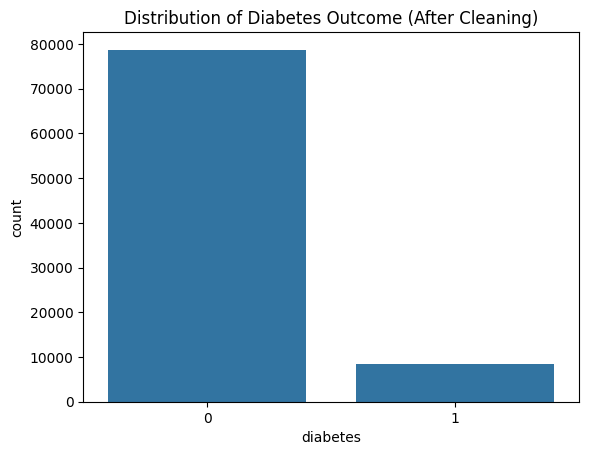

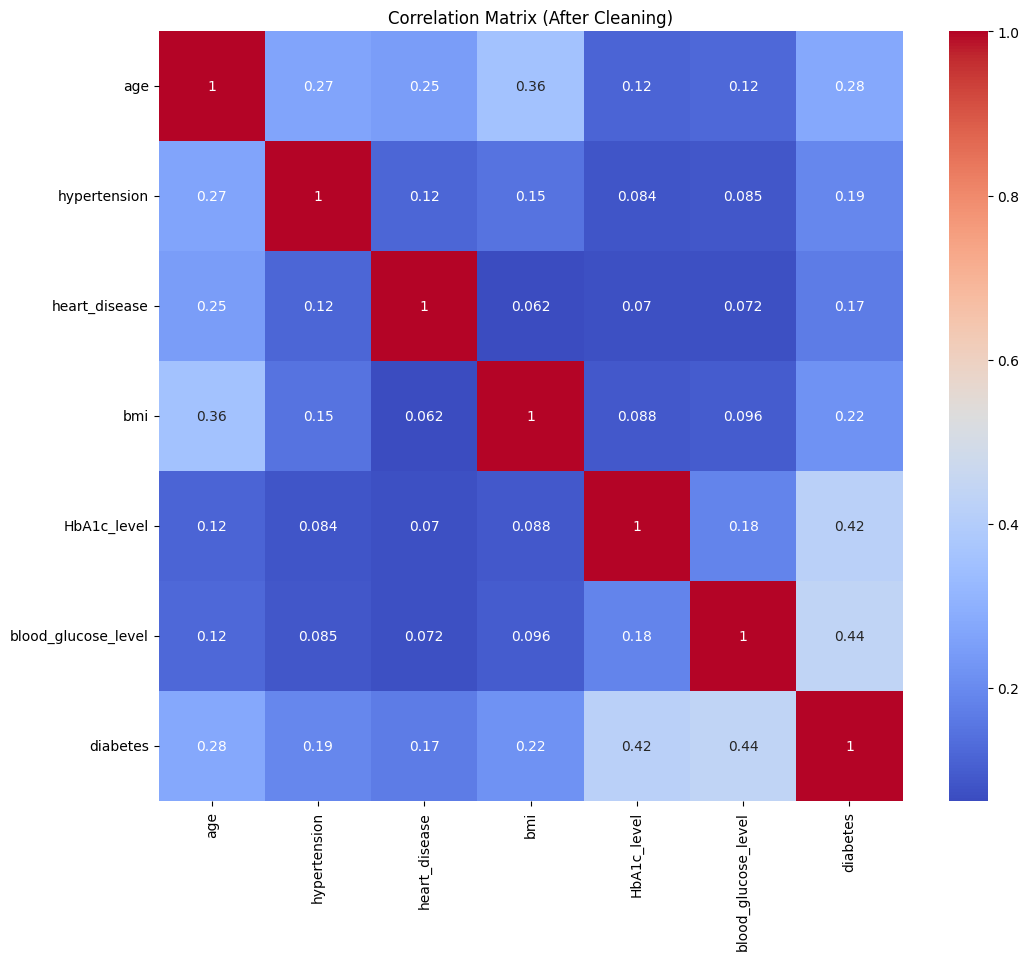

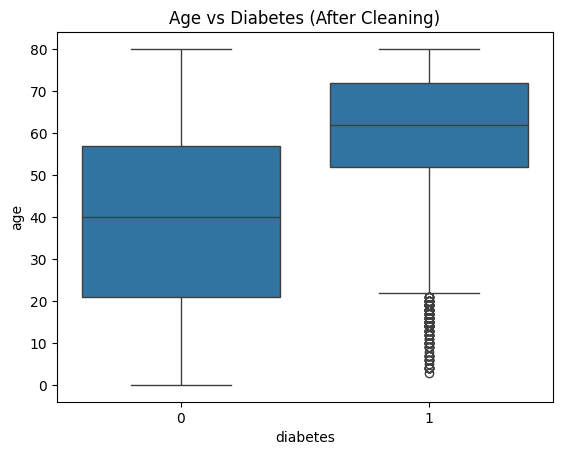

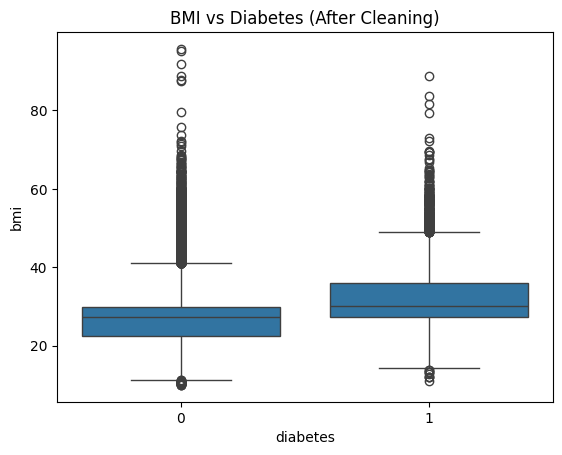

age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
# Visualize the distribution of diabetes outcome after cleaning
sns.countplot(x='diabetes', data=data)
plt.title('Distribution of Diabetes Outcome (After Cleaning)')
plt.show()

# Visualize the correlation between features after cleaning
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (After Cleaning)')
plt.show()

# Visualize the relationship between age and diabetes after cleaning
sns.boxplot(x='diabetes', y='age', data=data)
plt.title('Age vs Diabetes (After Cleaning)')
plt.show()

# Visualize the relationship between bmi and diabetes after cleaning
sns.boxplot(x='diabetes', y='bmi', data=data)
plt.title('BMI vs Diabetes (After Cleaning)')
plt.show()

print(data.isnull().sum())


In [ ]:
import numpy as np


# Prepare the data for the CNN model
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

CNN

In [ ]:
# Reshape the data for CNN input (assuming we want to treat features as a 1D image)
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1) # Use .values to convert the DataFrame to a NumPy array before reshaping
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1) # Use .values to convert the DataFrame to a NumPy array before reshaping


# Build the CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

model_cnn = Sequential()
model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1))) #Conv1D: filters= 32:: convolution filters, ReLU:: Rectified Linear Unit
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))

# Compile the model
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model_cnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy_cnn = model_cnn.evaluate(X_test, y_test)
print('Test Accuracy:', accuracy_cnn)



Epoch 1/50
2178/2178 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8942 - loss: 0.4284 - val_accuracy: 0.9276 - val_loss: 0.1852
Epoch 2/50
2178/2178 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9389 - loss: 0.1649 - val_accuracy: 0.9541 - val_loss: 0.1300
Epoch 3/50
2178/2178 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9490 - loss: 0.1386 - val_accuracy: 0.9422 - val_loss: 0.1392
Epoch 4/50
2178/2178 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9520 - loss: 0.1298 - val_accuracy: 0.9534 - val_loss: 0.1223
Epoch 5/50
2178/2178 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9542 - loss: 0.1266 - val_accuracy: 0.9576 - val_loss: 0.1178
Epoch 6/50
2178/2178 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9528 - loss: 0.1249 - val_accuracy: 0.9501 - val_loss: 0.1250
Epoch 7/50
2178/2178 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9564 - loss: 0.1198 - val_accuracy: 0.9549 - val_loss: 0.1271
Epoch 8/50
2178/2178 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9550 - loss: 0.1200

XGBoost (Extreme Gradient Boosting)

In [ ]:
#importing model that are required
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score



# Create an XGBoost classifier
model_xgboost = XGBClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=6,      # Maximum depth of each tree
    learning_rate=0.1, # Learning rate
    random_state=42   # Random seed for reproducibility
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Training
model_xgboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_xgboost.predict(X_test)

accuracy_xgboost = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_xgboost)




Accuracy: 0.9684826913140824


Comparison between CNN & XGBoost

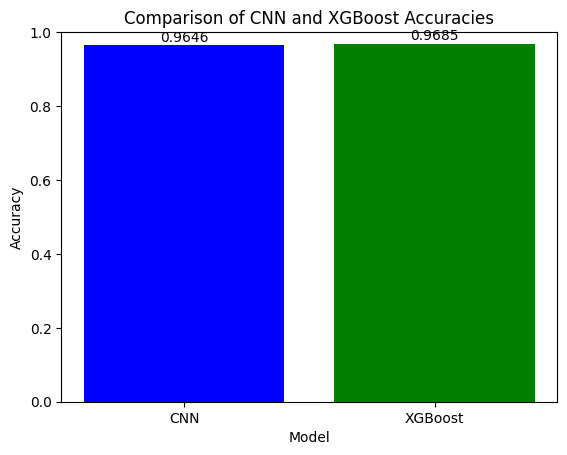

XGBoost model has better accuracy.


In [ ]:
import matplotlib.pyplot as plt

cnn_accuracy = accuracy_cnn
xgboost_accuracy = accuracy_xgboost


models = ['CNN', 'XGBoost']
accuracies = [cnn_accuracy, xgboost_accuracy]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of CNN and XGBoost Accuracies')
plt.ylim(0, 1)

# Add labels to the bars
for i, v in enumerate(accuracies):
  plt.text(i, v + 0.01, str(round(v, 4)), ha='center')

plt.show()

# Determine which model is better based on accuracy
if cnn_accuracy > xgboost_accuracy:
  print("CNN model has better accuracy.")
elif xgboost_accuracy > cnn_accuracy:
  print("XGBoost model has better accuracy.")
else:
  print("Both models have the same accuracy.")


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Define the parameter grid for hyperparameter tuning
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

knn = KNeighborsClassifier()

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_knn = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Calculate accuracy on the test set
knn_accuracy = best_knn.score(X_test, y_test)
print("KNN Accuracy:", knn_accuracy)

y_pred = best_knn.predict(X_test)
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
KNN Accuracy: 0.9622251564383719
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     15747
           1       0.95      0.64      0.76      1672

    accuracy                           0.96     17419
   macro avg       0.96      0.82      0.87     17419
weighted avg       0.96      0.96      0.96     17419



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Create a Logistic Regression model
model_logistic = LogisticRegression()

# Train the model
model_logistic.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_logistic.predict(X_test)

# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy_logistic)

Logistic Regression Accuracy: 0.9555083529479305


Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     15747
           1       0.90      0.69      0.78      1672

    accuracy                           0.96     17419
   macro avg       0.93      0.84      0.88     17419
weighted avg       0.96      0.96      0.96     17419

[[15620   127]
 [  522  1150]]


Don't have to all of this, this is nothing but waste of time, Bottom one is okay.
But you got time then 👌


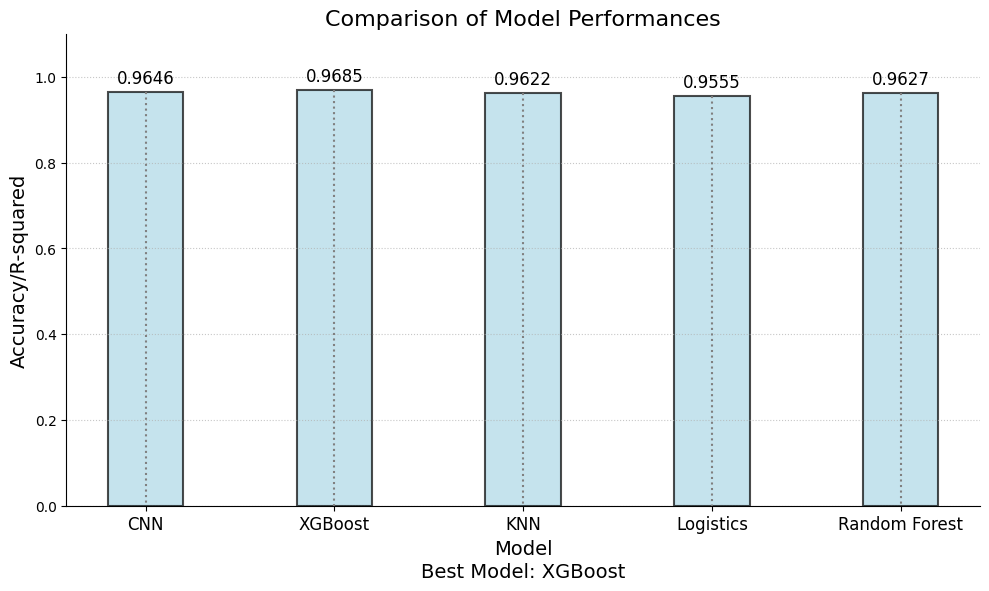

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Get the test accuracy for each model
cnn_accuracy = accuracy_cnn
xgboost_accuracy = accuracy_xgboost
knn_accuracy = knn_accuracy
logistic_accuracy = accuracy_logistic
forest_accuracy = accuracy_rf


# Create a bar chart to compare the accuracies
models = ['CNN', 'XGBoost', 'KNN', 'Logistics', 'Random Forest']
accuracies = [cnn_accuracy, xgboost_accuracy, knn_accuracy, logistic_accuracy, forest_accuracy]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define bar width and positions
bar_width = 0.4
bar_positions = np.arange(len(models))

# Create bars with faded look
bars = ax.bar(bar_positions, accuracies, color='lightblue', width=bar_width, alpha=0.7, edgecolor='black', linewidth=1.5)

# Add dotted lines from top of bars to the x-axis
for bar in bars:
    ax.plot([bar.get_x() + bar.get_width() / 2, bar.get_x() + bar.get_width() / 2], [bar.get_height(), 0], linestyle='dotted', color='gray')

# Customize the plot
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Accuracy/R-squared', fontsize=14)
ax.set_title('Comparison of Model Performances', fontsize=16)
ax.set_xticks(bar_positions)
ax.set_xticklabels(models, fontsize=12)
ax.set_ylim(0, 1.1)  # Set the y-axis limit to 0-1 for accuracy

# Add data labels on top of the bars
for i, v in enumerate(accuracies):
    ax.text(i, v + 0.02, str(round(v, 4)), ha='center', fontsize=12)


# Determine which model is better based on accuracy/R-squared
best_model = models[np.argmax(accuracies)]
plt.text(0.5, -0.15, f"Best Model: {best_model}", ha='center', fontsize=14, transform=ax.transAxes)

# Remove top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a grid for better readability
ax.grid(axis='y', linestyle='dotted', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


This is good

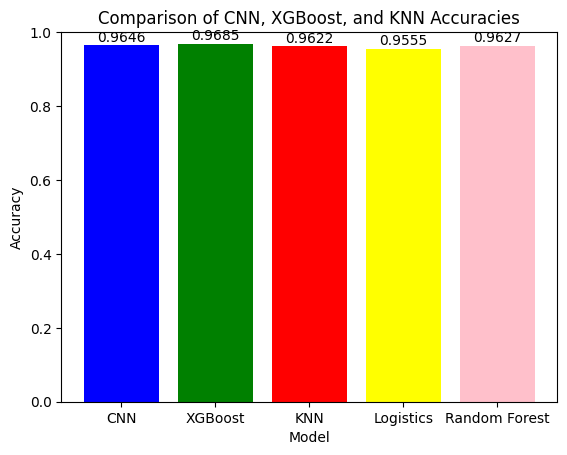

XGBoost model has the maximum accuracy.


In [ ]:
import matplotlib.pyplot as plt


cnn_accuracy = accuracy_cnn
xgboost_accuracy = accuracy_xgboost
knn_accuracy = knn_accuracy
logistic_accuracy = accuracy_logistic
forest_accuracy = accuracy_rf


# Create a bar chart to compare the accuracies
models = ['CNN', 'XGBoost', 'KNN', 'Logistics', 'Random Forest']
accuracies = [cnn_accuracy, xgboost_accuracy, knn_accuracy, logistic_accuracy, forest_accuracy]

plt.bar(models, accuracies, color=['blue', 'green', 'red', 'yellow', 'pink'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of CNN, XGBoost, and KNN Accuracies')
plt.ylim(0, 1)  # Set the y-axis limit to 0-1 for accuracy

# Add labels to the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, str(round(v, 4)), ha='center')

plt.show()

# Determine which model is better based on accuracy
best_model = max(models, key=lambda model: accuracies[models.index(model)])
print(f"{best_model} model has the maximum accuracy.")


Please enter the following details:
Age: 80
Hypertension (0 for No, 1 for Yes): 0
Heart Disease (0 for No, 1 for Yes): 0
BMI: 27.32
HbA1c Level: 8.2
Blood Glucose Level: 260
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step

Predictions:
CNN: Not Diabetic
XGBoost: Diabetic
KNN: Diabetic
Logistic Regression: Diabetic
Random Forest: Diabetic


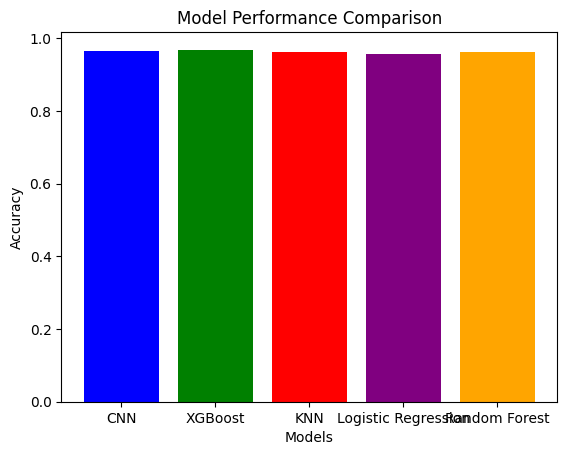

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to get user input and predict using each model
def predict_diabetes():
    print("Please enter the following details:")
    age = float(input("Age: "))
    hypertension = int(input("Hypertension (0 for No, 1 for Yes): "))
    heart_disease = int(input("Heart Disease (0 for No, 1 for Yes): "))
    bmi = float(input("BMI: "))
    HbA1c_level = float(input("HbA1c Level: "))
    blood_glucose_level = float(input("Blood Glucose Level: "))

    # Create a DataFrame with the user input
    user_data = pd.DataFrame({
        'age': [age],
        'hypertension': [hypertension],
        'heart_disease': [heart_disease],
        'bmi': [bmi],
        'HbA1c_level': [HbA1c_level],
        'blood_glucose_level': [blood_glucose_level]
    })

    # Normalize the user input using the same scaler used for training
    user_data_scaled = scaler.transform(user_data)

    # Reshape the input for CNN
    user_data_reshaped = user_data_scaled.reshape(user_data_scaled.shape[0], user_data_scaled.shape[1], 1)

    # Predict using each model
    cnn_prediction = model_cnn.predict(user_data_reshaped)[0][0]
    xgboost_prediction = model_xgboost.predict(user_data_scaled)[0]
    knn_prediction = best_knn.predict(user_data_scaled)[0]
    logistic_prediction = model_logistic.predict(user_data_scaled)[0]
    forest_prediction = rf.predict(user_data_scaled)[0]

    # Convert predictions to readable format
    def interpret_prediction(pred):
        return "Diabetic" if pred > 0.5 else "Not Diabetic"

    # Print the predictions
    print("\nPredictions:")
    print(f"CNN: {interpret_prediction(cnn_prediction)}")
    print(f"XGBoost: {interpret_prediction(xgboost_prediction)}")
    print(f"KNN: {interpret_prediction(knn_prediction)}")
    print(f"Logistic Regression: {interpret_prediction(logistic_prediction)}")
    print(f"Random Forest: {interpret_prediction(forest_prediction)}")

# Call the function to get predictions
predict_diabetes()

# Visualize model performances
models = ['CNN', 'XGBoost', 'KNN', 'Logistic Regression', 'Random Forest']
accuracies = [cnn_accuracy, xgboost_accuracy, knn_accuracy, logistic_accuracy, forest_accuracy]

plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.show()
